In [1]:
from google.colab import files
uploaded=files.upload()

Saving Logistic Regression.docx to Logistic Regression.docx
Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

# Display the first few rows
print(train_data.head())
print(test_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
# Check for missing values
print(train_data.isnull().sum())

# Check data types
print(train_data.dtypes)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Fill missing Age values with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent category
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill missing Fare values in test data with median fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


<ipython-input-4-f4881324f711>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-4-f4881324f711>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical features into numeric
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])


In [6]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split train data for validation
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)


LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_valid)


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8001930501930502


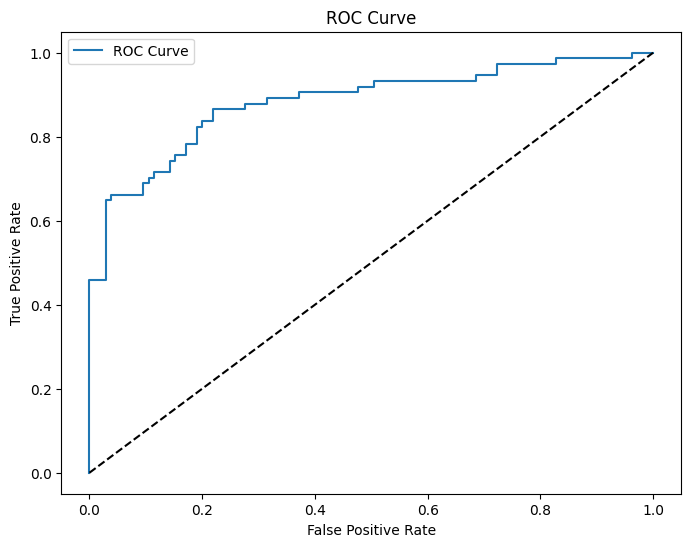

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_valid, model.predict_proba(X_valid)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [11]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))


    Feature  Coefficient
5      Fare     0.002534
2       Age    -0.030433
4     Parch    -0.111851
6  Embarked    -0.218777
3     SibSp    -0.293906
0    Pclass    -0.930680
1       Sex    -2.596995


In [21]:
import pickle

# Save the trained model
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [22]:
import os

if os.path.exists('titanic_model.pkl'):
    print("Model file found!")
else:
    print("Model file missing!")


Model file found!


In [23]:
import pickle
import streamlit as st
import numpy as np

# Try to load the model safely
try:
    with open('titanic_model.pkl', 'rb') as file:
        model = pickle.load(file)
    st.success("Model loaded successfully!")
except (FileNotFoundError, EOFError):
    st.error("Model file not found or is corrupted. Please retrain and save the model.")
    model = None  # Set model to None so we don’t run predictions


2025-02-24 15:58:37.350 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:58:37.524 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-24 15:58:37.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split train data for validation
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

# Save the model properly
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [27]:
!streamlit run streamlit_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit_app.py


1. 1. What is the difference between precision and recall?
**Precision vs. Recall:**  
   - **Precision** = TP / (TP + FP) → Measures how many of the predicted positives are actually correct.  
   - **Recall** = TP / (TP + FN) → Measures how many actual positives were correctly identified.  
   - **Trade-off:** High precision means fewer false positives, while high recall means fewer false negatives.  

2. 2. What is cross-validation, and why is it important in binary classification?  
**Cross-Validation:**  
   - A technique to evaluate model performance by splitting data into multiple training and validation sets.  
   - **Importance in binary classification:** Helps prevent overfitting, ensures the model generalizes well, and provides a more reliable estimate of performance.